In [70]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import theano.tensor as tt
import pymc3 as pm

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('notebook')

In [202]:
def plot_posterior(n, alpha, beta):
    with pm.Model() as model:
        theta = pm.Beta('theta', alpha, beta)
        likelihood = pm.Binomial('bin', n, theta, observed=n)
        b = pm.Bernoulli('post', theta)
        trace = pm.sample()
        print("Posterior con alpha: ", alpha, " y beta: ", beta)
        #SACARprint("max: ", trace['prior'].max())
        print("Mean: ", trace['theta'].mean())
        print('Max: ', pm.find_MAP(model=model)['theta'])
        pm.plot_posterior(trace);
        return model, trace

def analize(n):
    model1, trace1 = plot_posterior(n, 1, 1)
    model50, trace50 = plot_posterior(n, 50, 50)
    
    
    


Assigned NUTS to theta_logodds__
Assigned BinaryGibbsMetropolis to post
100%|██████████| 1000/1000 [00:00<00:00, 2038.31it/s]


Posterior con alpha:  1  y beta:  1
Mean:  0.873547341028


logp = -4.852, ||grad|| = 2.5: 100%|██████████| 8/8 [00:00<00:00, 3103.73it/s]


Max:  0.857142841107735


Assigned NUTS to theta_logodds__
Assigned BinaryGibbsMetropolis to post
100%|██████████| 1000/1000 [00:00<00:00, 2157.32it/s]


Posterior con alpha:  50  y beta:  50
Mean:  0.522894045905


logp = -2.7777, ||grad|| = 2.5: 100%|██████████| 6/6 [00:00<00:00, 2607.05it/s]

Max:  0.5238095237626262


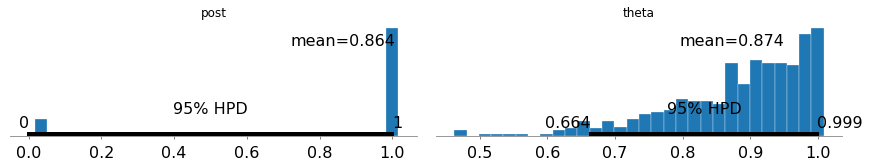

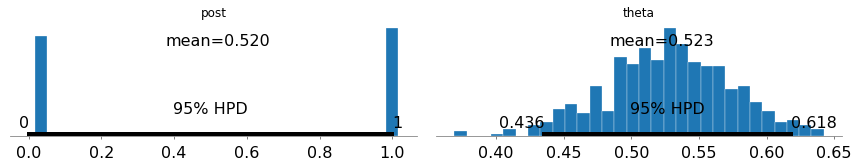

In [203]:
analize(6)

Assigned NUTS to theta_logodds__
Assigned BinaryGibbsMetropolis to post
100%|██████████| 1000/1000 [00:00<00:00, 2002.52it/s]


Posterior con alpha:  1  y beta:  1
Mean:  0.806756670963


logp = -2.7726, ||grad|| = 1: 100%|██████████| 6/6 [00:00<00:00, 3046.34it/s]


Max:  0.7499996941800062


Assigned NUTS to theta_logodds__
Assigned BinaryGibbsMetropolis to post
100%|██████████| 1000/1000 [00:00<00:00, 2071.86it/s]


Posterior con alpha:  50  y beta:  50
Mean:  0.518055835184


logp = -0.6983, ||grad|| = 1: 100%|██████████| 5/5 [00:00<00:00, 2321.40it/s]

Max:  0.5098038489466665


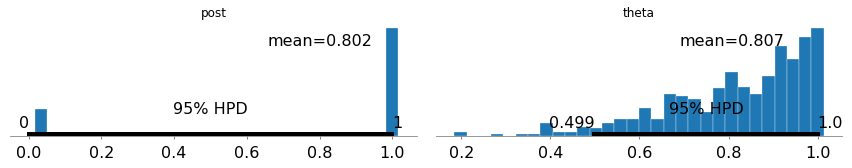

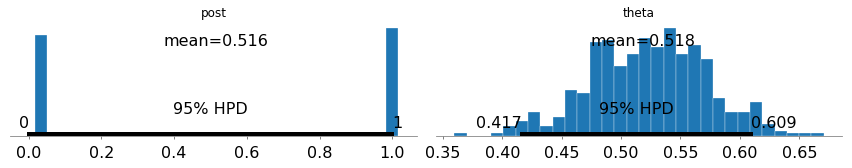

In [204]:
analize(3)

Assigned NUTS to theta_logodds__
Assigned BinaryGibbsMetropolis to post
100%|██████████| 1000/1000 [00:00<00:00, 1829.45it/s]


Posterior con alpha:  1  y beta:  1
Mean:  0.952614338879


logp = -14.556, ||grad|| = 9.5: 100%|██████████| 10/10 [00:00<00:00, 3342.34it/s]


Max:  0.9523809484178871


Assigned NUTS to theta_logodds__
Assigned BinaryGibbsMetropolis to post
100%|██████████| 1000/1000 [00:00<00:00, 2057.79it/s]


Posterior con alpha:  50  y beta:  50
Mean:  0.583636857501


logp = -12.482, ||grad|| = 9.5: 100%|██████████| 6/6 [00:00<00:00, 2674.94it/s]

Max:  0.5798319307582185


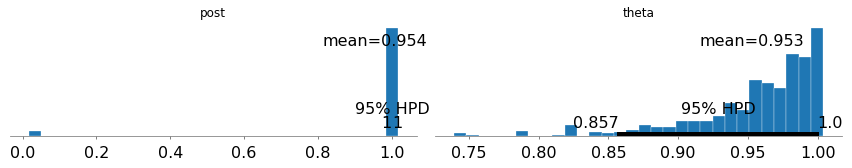

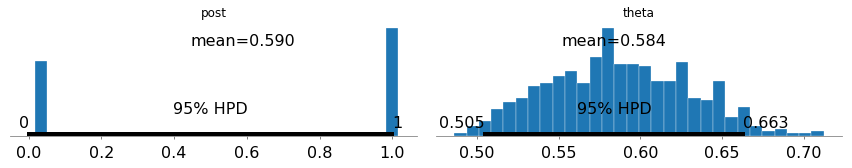

In [205]:
analize(20)

## 4) Análisis:
    
### 3 tiradas con 3 caras
    
    En este caso, para un alpha y beta con valor 1, es decir, un prior en el que no asumo nada, podemos observar como el modelo me dice que es muy probable que la moneda esté cargada.
    En cambio, cuando suponemos como prior que es equiprobable que salga cara o seca, y le decimos que observamos 3 caras, claramente es muy poco evidencia como para que altere nuestra suposición de equiprobabilidad. Por lo tanto, al querer predecir la próxima tirada, podemos ver probabilidades del 50% para cada valor posible.
    
### 20 tiradas con 20 caras
    
    Aquí, con un prior en el que no asumimos nada, pasa lo mismo que en el caso anterior, pero más marcado aún, estoy exponiendo más evidencia para afirmar que la moneda podría llegar a estar cargada. En este caso una próxima tirada tiene probabilidad mayor a 95% de mostrar una cara, y en el caso anterior rondaba el 80%.
    Para el prior donde suponemos de antemano que la moneda no está cargada, podemos ver como la evidencia empieza a pesar más y muestra una leve inclinación hacia la idea de que la moneda esté cargada. Esto lo podemos notar en la predicción de la siguiente tirada, donde la probabilidad está muy cerca del 60%.

5)

Una idea razonable para empezar a sospechar que la moneda está cargada, es con 5 tiradas. Luego de ver 5 tiradas consecutivas de car, comenzamos a sospechar que la moneda está cargada, y de esta manera un prior razonable es utilzar una distribucion Beta(aplha,aplha)

Assigned NUTS to theta_logodds__
Assigned BinaryGibbsMetropolis to post
100%|██████████| 1000/1000 [00:00<00:00, 1051.35it/s]


Posterior con alpha:  0.01  y beta:  0.01
Mean:  0.992304321213


logp = -5.3762, ||grad|| = 0.00104: 100%|██████████| 14/14 [00:00<00:00, 2917.92it/s]  

Max:  0.9988905431839628


(<pymc3.model.Model at 0x7f37d008e400>,
 <MultiTrace: 1 chains, 500 iterations, 3 variables>)

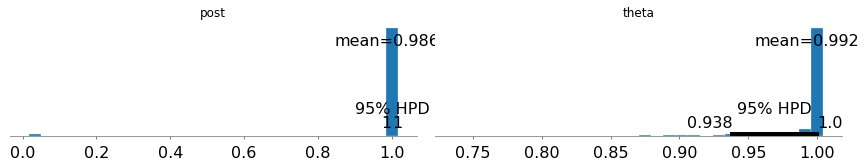

In [207]:
plot_posterior(5, 0.01, 0.01)